# K-NN

1. Escolha no número de K vizinhos (bastante utilizado, é K =5)
2. Encontre o K vizinhos mais pertos, utilizando a distancia Euclidiana (mais utilizada, mas pode usar qq outro metodo)
3. Faça a contagem das categorias que tem nesse grupo
4. Atribua ao novo ponto a categoria que mais se encontra nesse grupo


## Distancia Euclidiana

Lembrando que a distancia Euclidiana é dada por:

Imagine pontos P1 e P2, com as coordenadas X1, Y1 e X2, Y2

$$distance = \sqrt{(x2 - x1)^2 + (y2 -y1)^2}$$

Distancia euclidiana também é conhecida como **L2**

Mais info: https://en.wikipedia.org/wiki/Euclidean_distance


## Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Create the dataset and X and y datasets
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [4]:
# Split the dataset into train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scalling - necessario para o SVR
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier

# Por padrao, K já e 5
# Por padrao, a distancia é a manhattan (L1), mas queremos a Euclidiana (L2), portanto, p = 2 e metric = minkowski
classifier = KNeighborsClassifier(p = 2, metric = 'minkowski') 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1])

### Evaluating the results

Criando a _Confusion Matrix_

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

### Visualizando os resultados

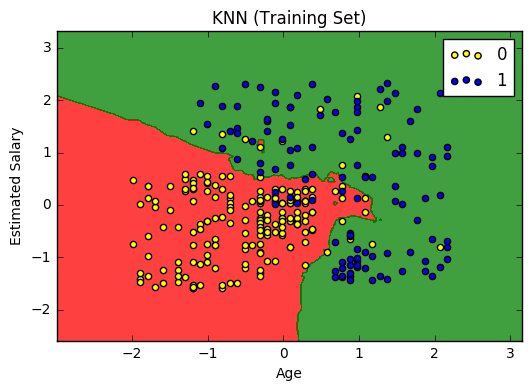

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))
    
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('KNN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* Os pontos são as pontos de observação do training set
* A região vermelha é a prevista de purchased 0 (não comprou) e a verde é 1 (que comprou)
* Pontos amarelos não compraram, e os azuis compraram

Observações:

* Os que tem pouca idade, e pouco salário, não compraram o carro
* Os mais velhos, e com salário maior, compraram o carro


Agora para os dados de teste:

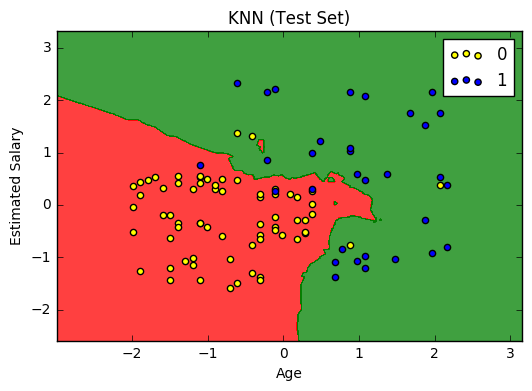

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

# Pega o menor do valor do X_Set e do maior valor, e incrementa 0.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() +1, step = 0.01), 
np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() +1, step = 0.01))

# Para cada pixel do grafico, aplica o predict, para pintar de vermelho ou verde
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
    
plt.title('KNN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()